In [73]:
%matplotlib notebook

In [74]:
# LSTM for SPY data 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [75]:
# convert an array of values into a p_t matrix
def create_dataset(p_t, look_back=1):
	dataX, dataY = [], []
	for i in range(len(p_t)-look_back-1):
		a = p_t[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(p_t[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [76]:
# fix random seed for reproducibility
np.random.seed(7)

# load the p_t
df = read_csv('sp500.csv', usecols=[0], engine='python', skipfooter=3)
p_t = df.values       
p_t = p_t.astype('float32')

In [77]:
#p_t.shape   #df.values

In [78]:
# normalize the p_t
scaler = MinMaxScaler(feature_range=(0, 1))
p_t = scaler.fit_transform(p_t)

# split into train and test sets
N_train = int(len(p_t) * 0.67)
N_test = len(p_t) - N_train
train, test = p_t[0:N_train,:], p_t[N_train:len(p_t),:]

In [79]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [80]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
1s - loss: 0.0866
Epoch 2/100
0s - loss: 0.0308
Epoch 3/100
0s - loss: 0.0118
Epoch 4/100
0s - loss: 0.0089
Epoch 5/100
0s - loss: 0.0080
Epoch 6/100
0s - loss: 0.0071
Epoch 7/100
0s - loss: 0.0061
Epoch 8/100
0s - loss: 0.0049
Epoch 9/100
0s - loss: 0.0036
Epoch 10/100
0s - loss: 0.0024
Epoch 11/100
0s - loss: 0.0014
Epoch 12/100
0s - loss: 6.8915e-04
Epoch 13/100
0s - loss: 3.3157e-04
Epoch 14/100
0s - loss: 1.9540e-04
Epoch 15/100
0s - loss: 1.5609e-04
Epoch 16/100
0s - loss: 1.4638e-04
Epoch 17/100
0s - loss: 1.4378e-04
Epoch 18/100
0s - loss: 1.4212e-04
Epoch 19/100
0s - loss: 1.4137e-04
Epoch 20/100
0s - loss: 1.3997e-04
Epoch 21/100
0s - loss: 1.3819e-04
Epoch 22/100
0s - loss: 1.3697e-04
Epoch 23/100
0s - loss: 1.3568e-04
Epoch 24/100
0s - loss: 1.3460e-04
Epoch 25/100
0s - loss: 1.3288e-04
Epoch 26/100
0s - loss: 1.3160e-04
Epoch 27/100
0s - loss: 1.3010e-04
Epoch 28/100
0s - loss: 1.2884e-04
Epoch 29/100
0s - loss: 1.2761e-04
Epoch 30/100
0s - loss: 1.2629e-04
Epo

In [81]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(p_t)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(p_t)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(p_t)-1, :] = testPredict

Train Score: 15.06 RMSE
Test Score: 65.90 RMSE


<IPython.core.display.Javascript object>


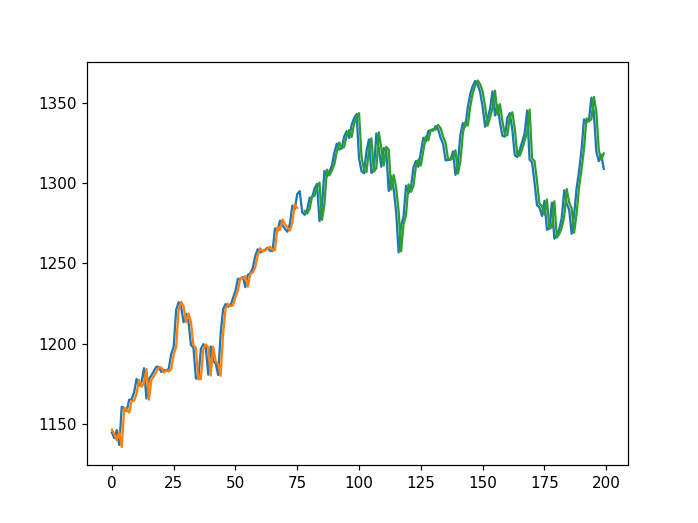

In [82]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(p_t[2700:2900]))
plt.plot(trainPredictPlot[2700:2900])
plt.plot(testPredictPlot[2700:2900])
plt.show()